# Generating Schroeder Table 3.1 and Figure 3.1


We have two Einstein solids, $A$ and $B$, which have $N_A$ and $N_B$ oscillators, respectively. The individual multiplicities of each solid are:
$$
        \Omega_A(N_A,q_A) = {q_A+N_A-1\choose q_A} = \frac{(q_A+N_A-1)!}{q_A!(N_A-1)!}
$$

$$
        \Omega_B(N_B,q_B) = {q_B+N_B-1\choose B_A} = \frac{(q_B+N_B-1)!}{q_B!(N_B-1)!}
$$

while the total multiplicity with $q_{\rm total} = q_A + q_B$ is
  $ \Omega_{\rm total} = \Omega_A \times \Omega_B$.


In [1]:
import numpy as np
import math
from scipy.special import comb
import matplotlib.pyplot as plt

In [2]:
def ein_mult(N, q):
    """
    Calculate the Einstein solid multiplicity and return it as
     an integer.
    """
    return int(comb(q + N -1, q))  

In [3]:
def ein_entropy_over_k(N, q):
    """
    Calculate the Einstein solid entropy divided by k (so just the
      ln of the multiplicity).
    """
    return np.log(np.float64(ein_mult(N,q)))  

In [4]:
def convert_int(my_int, large=10**6):
    """
    If my_int is larger than large, return an exponential form.
      The right justification for ints should be log10(large) + 1.
    """
    if my_int > large:
        return "{: .1e}".format(my_int)
    else:
        return "{:>8}".format(my_int)

In [5]:
def round_to_n(num, sigfigs):
    """
    Round off num to the specifie number of sigfigs (significant figures)
    """
    if num == 0:
        return num
    else:
        return round(num, -int(math.floor(math.log10(abs(num)))) + (sigfigs - 1))
    

In [6]:
def central_diff(array, index, delta=1):
    """
    Calculate the derivative of array at index by central difference
    """
    return (array[index + 1] - array[index - 1]) / (2 * delta)

In [7]:
def forward_diff(array, index, delta=1):
    """
    Calculate the derivative of array at index by forward difference
    """
    return (array[index + 1] - array[index]) / delta

In [8]:
def backward_diff(array, index, delta=1):
    """
    Calculate the derivative of array at index by backward difference
    """
    return (array[index] - array[index - 1]) / delta

In [9]:
def macrostate_table(N_A, N_B, q_tot, table=True):
    """
    Step through q_A and q_B = q_tot - q_A and use ein_mult 
      to find Omega_A and Omega_B.
    Total multiplicity from: Omega_tot = Omega_A * Omega_B
   
    Construct a table like in Schroeder with macrostates 
      and multiplicities for a system of two Einstein solids
      and return an array of Omega_tot values.
      
    If table=False, don't print the table but return the array
     of Omega_tot values.
    """
    if table:
        print(' q_A  Omega_A  S_A/k  T_A ',
              ' q_B  Omega_B  S_B/k T_B ',
              'Omega_tot S_tot/k')
    tot_microstates = 0
    # Collect values in arrays
    Omega_A_array = np.zeros(q_tot+1)  
    Omega_B_array = np.zeros(q_tot+1)  
    Omega_tot_array = np.zeros(q_tot+1)
    S_A_array = np.zeros(q_tot+1)  
    S_B_array = np.zeros(q_tot+1)  
    S_tot_array = np.zeros(q_tot+1)
    
    for q_A in range(q_tot+1):
        Omega_A_array[q_A] = ein_mult(N_A, q_A) 
        S_A_array[q_A] = ein_entropy_over_k(N_A, q_A) 
        
        q_B = q_tot - q_A
        Omega_B_array[q_A] = ein_mult(N_B, q_B) 
        S_B_array[q_A] = ein_entropy_over_k(N_B, q_B) 

        Omega_tot_array[q_A] = Omega_A_array[q_A] * Omega_B_array[q_A]
        tot_microstates += Omega_tot_array[q_A]
        S_tot_array[q_A] = np.log(np.float64(Omega_tot_array[q_A]))
        
    if table:
        eps = 0.1  # in eV
        kBoltz = 8.62e-5  # in eV/K
        fac = eps / kBoltz  # convert q to K
        for q_A in range(q_tot+1):
            q_B = q_tot - q_A
            T_A = 0
            T_B = 0
            # Calculate derivatives by central or forward/backward differences
            if q_A > 0 and q_A < q_tot:
                T_A = fac / central_diff(S_A_array, q_A) 
                T_B = -fac / central_diff(S_B_array, q_A) 
            elif q_A == 0:
                T_A = fac / forward_diff(S_A_array, q_A) 
                T_B = -fac / forward_diff(S_B_array, q_A)               
            elif q_A == q_tot:
                T_A = fac / backward_diff(S_A_array, q_A) 
                T_B = -fac / backward_diff(S_B_array, q_A) 
            T_A = round_to_n(T_A, 2)
            T_B = round_to_n(T_B, 2)
            print (f'{q_A:> 4} {convert_int(Omega_A_array[q_A])}  {S_A_array[q_A]:5.1f} {T_A:4.0f} ',
                   f'{q_B:> 4} {convert_int(Omega_B_array[q_A])}  {S_B_array[q_A]:5.1f} {T_B:4.0f}',
                   f'{convert_int(Omega_tot_array[q_A])}  {S_tot_array[q_A]:5.1f}')
        print(f'Total microstates = {convert_int(tot_microstates)}')

        return S_A_array, S_B_array, S_tot_array

### Schoeder Table and Figure in chapter 3

In [10]:
S_A_array, S_B_array, S_tot_array = macrostate_table(300, 200, 100)

 q_A  Omega_A  S_A/k  T_A   q_B  Omega_B  S_B/k T_B  Omega_tot S_tot/k
   0      1.0    0.0  200   100  2.8e+81  187.5 1100  2.8e+81  187.5
   1    300.0    5.7  220    99  9.3e+80  186.4 1100  2.8e+83  192.1
   2  45150.0   10.7  240    98  3.1e+80  185.3 1000  1.4e+85  196.0
   3  4.5e+06   15.3  260    97  1.0e+80  184.2 1000  4.6e+86  199.6
   4  3.4e+08   19.7  280    96  3.3e+79  183.1 1000  1.1e+88  202.8
   5  2.1e+10   23.8  290    95  1.1e+79  182.0 1000  2.3e+89  205.7
   6  1.1e+12   27.7  300    94  3.5e+78  180.9 1000  3.7e+90  208.5
   7  4.7e+13   31.5  310    93  1.1e+78  179.7 1000  5.2e+91  211.2
   8  1.8e+15   35.1  320    92  3.6e+77  178.6 1000  6.4e+92  213.7
   9  6.1e+16   38.7  330    91  1.1e+77  177.4 1000  6.9e+93  216.1
  10  1.9e+18   42.1  340    90  3.6e+76  176.3 1000  6.7e+94  218.3
  11  5.3e+19   45.4  350    89  1.1e+76  175.1  990  5.9e+95  220.5
  12  1.4e+21   48.7  360    88  3.4e+75  173.9  980  4.7e+96  222.6
  13  3.3e+22   51.9  370    87 

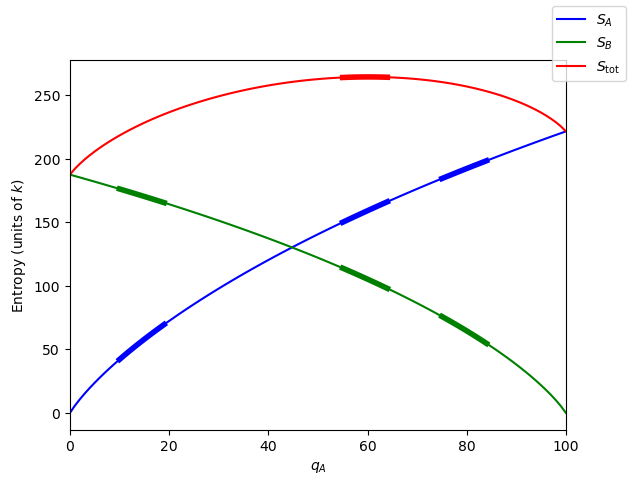

In [13]:
q1 = 10
q2 = 55
q3 = 75
dq = 10
fig, ax0 = plt.subplots(1, 1)
q_array = np.arange(len(S_tot_array))
ax0.plot(q_array, S_A_array, label=r'$S_A$', color='blue')
ax0.plot(q_array, S_B_array, label=r'$S_B$', color='green')
ax0.plot(q_array, S_tot_array, label=r'$S_{\rm tot}$', color='red')

ax0.plot(q_array[q1:q1+dq], S_A_array[q1:q1+dq], color='blue', lw=4)
ax0.plot(q_array[q1:q1+dq], S_B_array[q1:q1+dq], color='green', lw=4)

ax0.plot(q_array[q2:q2+dq], S_A_array[q2:q2+dq], color='blue', lw=4)
ax0.plot(q_array[q2:q2+dq], S_B_array[q2:q2+dq], color='green', lw=4)
ax0.plot(q_array[q2:q2+dq], S_tot_array[q2:q2+dq], color='red', lw=4)

ax0.plot(q_array[q3:q3+dq], S_A_array[q3:q3+dq], color='blue', lw=4)
ax0.plot(q_array[q3:q3+dq], S_B_array[q3:q3+dq], color='green', lw=4)

ax0.set_xlabel(r'$q_A$')
ax0.set_ylabel(r'Entropy (units of $k$)')
ax0.set_xlim(q_array[0], q_array[-1])
fig.legend();